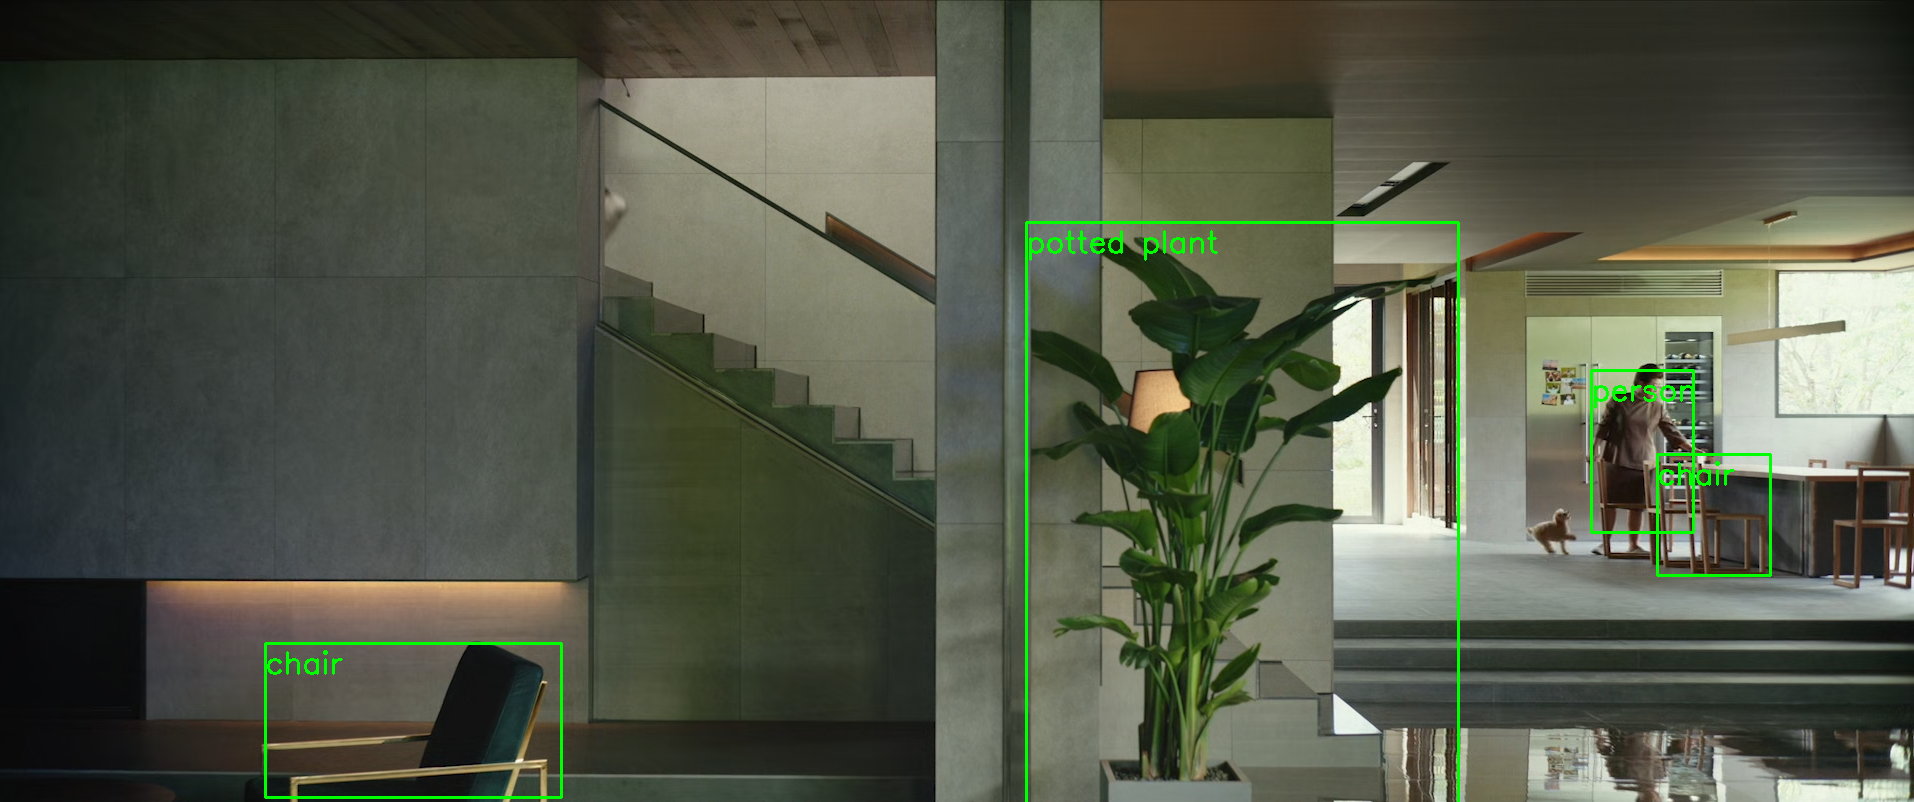

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Create coco.names file if it doesn't exist
coco_names_content = """person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
TV
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair dryer
toothbrush
Additional Common Objects (to reach 200):
suitcase
laptop bag
golf club
baseball
bowling ball
racket
volleyball
ice cream
french fries
salad
bread
chocolate
cookie
muffin
cupcake
pancake
sandwich
corn
potato
pepper
egg
fish
meat
chicken
shrimp
crab
sausage
bacon
sweet potato
apple pie
fruit
vegetable
flower
leaf
tree
rock
grass
mountain
river
ocean
lake
cloud
sun
moon
star
lightning
wind
storm
rainbow
desert
sand
beach
wave
shell
coral
fishnet
anchor
boat
paddle
surfboard
buoy
windsurf
kite
banner
poster
painting
drawing
sculpture
statue
mural
graffiti
billboard
street sign
crosswalk
pathway
fence
gate
wall
window
door
roof
chimney
balcony
porch
garden
yard
driveway
garage
building
skyscraper
castle
bridge
tunnel
highway
street
road
intersection
roundabout
path
lane
trail
track
sidewalk
pavement
curb
hill
valley
plain
meadow
forest
jungle
savanna
prairie
tundra
wetland
swamp
bog
marsh
pond
fountain"""

with open("coco.names", "w") as f:
    f.write(coco_names_content)

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
out_layers = net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in out_layers]

# Load an image (make sure to upload your image file)
image = cv2.imread("room3.png")  # Update this with your image filename
height, width, _ = image.shape

# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Forward pass through the network
outs = net.forward(output_layers)

# Initialize lists for detected bounding boxes, confidences, and class IDs
boxes = []
confidences = []
class_ids = []

# Process the outputs
for out in outs:
    for detection in out:
        scores = detection[5:]  # The scores are after the first 5 values
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Filter out weak predictions
        if confidence > 0.5:  # Adjust this threshold if necessary
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Calculate the coordinates of the bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Append the bounding box, confidence, and class ID
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maxima suppression to remove overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Draw bounding boxes and labels on the image
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, label, (x, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the output image
cv2_imshow(image)

# -------- YOLO ----------
# !wget https://pjreddie.com/media/files/yolov3.weights && wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg && wget https://github.com/pjreddie/darknet/raw/master/data/coco.names
